In [1]:
import nltk
from collections import Counter
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import numpy as np
import scipy.stats.stats as st

# Read File

In [2]:
new_path = '/home/cloudera/cs2.txt'
def read_file(str):
    file = open(str,'r')
    txt=file.read()
    #print(txt)
    return txt

In [3]:
txt=read_file(new_path)
txt


'Computer science is a discipline that spans theory and practice. It requires thinking both in abstract terms and in concrete terms. The practical side of computing can be seen everywhere. Nowadays, practically everyone is a computer user, and many people are even computer programmers.Getting computers to do what you want them to do requires intensive hands-on experience. But computer science can be seen on a higher level, as a science of problem solving. Computer scientists must be adept at modeling and analyzing problems. They must also be able to design solutions and verify that they are correct. Problem solving requires precision, creativity, and careful reasoning.Computer science also has strong connections to other disciplines. Many problems in science, engineering, health care, business, and other areas can be solved effectively with computers, but finding a solution requires both computer science expertise and knowledge of the particular application domain. Thus, computer scien

In [4]:
type(txt)

str

# Split Document to pragraphs 

In [5]:
def txt_pragraphs(str):
    pragraphs = str.split("\n\n")
    return pragraphs
pragraphs=txt_pragraphs(txt)
type(pragraphs)
print ("Number of Paragraphs",len(pragraphs))


Number of Paragraphs 7


In [6]:
n_pragraph=0
pragraphs[n_pragraph]


'Computer science is a discipline that spans theory and practice. It requires thinking both in abstract terms and in concrete terms. The practical side of computing can be seen everywhere. Nowadays, practically everyone is a computer user, and many people are even computer programmers.Getting computers to do what you want them to do requires intensive hands-on experience. But computer science can be seen on a higher level, as a science of problem solving. Computer scientists must be adept at modeling and analyzing problems. They must also be able to design solutions and verify that they are correct. Problem solving requires precision, creativity, and careful reasoning.Computer science also has strong connections to other disciplines. Many problems in science, engineering, health care, business, and other areas can be solved effectively with computers, but finding a solution requires both computer science expertise and knowledge of the particular application domain. Thus, computer scien

In [7]:
for index in range(len(pragraphs)):
    print("Paragraph:",index,"\n")
    print(pragraphs[index],"\n")
    print("-------------------------------------------------------------\n")
    

Paragraph: 0 

Computer science is a discipline that spans theory and practice. It requires thinking both in abstract terms and in concrete terms. The practical side of computing can be seen everywhere. Nowadays, practically everyone is a computer user, and many people are even computer programmers.Getting computers to do what you want them to do requires intensive hands-on experience. But computer science can be seen on a higher level, as a science of problem solving. Computer scientists must be adept at modeling and analyzing problems. They must also be able to design solutions and verify that they are correct. Problem solving requires precision, creativity, and careful reasoning.Computer science also has strong connections to other disciplines. Many problems in science, engineering, health care, business, and other areas can be solved effectively with computers, but finding a solution requires both computer science expertise and knowledge of the particular application domain. Thus, 

# Split Paragraph to Sentences 

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize


In [9]:
#print(sent_tokenize(pragraphs(txt)[1]))
def pragraph_to_setnences(str):
    return sent_tokenize(str)
setnences=pragraph_to_setnences(pragraphs[n_pragraph])


In [10]:
type(setnences)
print("Number of sentences.",len(setnences),"of Pragraph No.",n_pragraph)

Number of sentences. 15 of Pragraph No. 0


In [11]:
print("Sentences Paragraph No.",n_pragraph,"\n")
for index in range(len(setnences)):
    
    #if index < len(setnences):
        print(index,": ",setnences[index],"\n")
        print("-------------------------------------------------------------\n")

Sentences Paragraph No. 0 

0 :  Computer science is a discipline that spans theory and practice. 

-------------------------------------------------------------

1 :  It requires thinking both in abstract terms and in concrete terms. 

-------------------------------------------------------------

2 :  The practical side of computing can be seen everywhere. 

-------------------------------------------------------------

3 :  Nowadays, practically everyone is a computer user, and many people are even computer programmers.Getting computers to do what you want them to do requires intensive hands-on experience. 

-------------------------------------------------------------

4 :  But computer science can be seen on a higher level, as a science of problem solving. 

-------------------------------------------------------------

5 :  Computer scientists must be adept at modeling and analyzing problems. 

-------------------------------------------------------------

6 :  They must also be 

## Word Process For Sentence

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

## Removing English stopwords and Punct per Sentence

In [13]:
new_stop_words = ['the', 'that', 'to', 'as', 'there', 'has', 'and', 'or', 'is', 'not', 'a', 'of', 'but', 'in', 'by', 'on', 'are', 'it', 'if','what','where','how','when']
new_stop_words2=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','even','until','then','must']

from stemming.porter2 import stem
from nltk import PorterStemmer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
#stemmer = PorterStemmer()
stemmer = SnowballStemmer("english", ignore_stopwords=True)
def remove_stopword_sentences(str):
    tokenizer = RegexpTokenizer("[\w']+")
    
    words=tokenizer.tokenize(str)
    
    #print("words count before remove stopwords ",len(words))
    english_stops = set(stopwords.words('english'))
    stems=[]
    list_word=[word for word in words if word.lower() not in english_stops and word.lower() not in new_stop_words and word.lower() not in new_stop_words2]
    #print("words count after remove stopwords ",len(list_word))
    for word in list_word:
        #stems.append(stem(word))
        #stems.append(PorterStemmer().stem(word))
        #stems.append(stemmer.stem(word))
        #stems.append(stemmer.stem("computer"))
        stems.append(word)
    
    return stems#(stem(setem_word for setem_word in  ([word for word in words if word not in english_stops and word not in new_stop_words])))

In [14]:
words=remove_stopword_sentences(setnences[n_pragraph])
count = Counter(words)
# to count words
#print (count.most_common(10))
print(words)
print(count)

['Computer', 'science', 'discipline', 'spans', 'theory', 'practice']
Counter({'science': 1, 'spans': 1, 'practice': 1, 'Computer': 1, 'discipline': 1, 'theory': 1})


In [15]:
pragraphs=txt_pragraphs(txt)
for index in range(len(pragraphs)):
    print("Paragraph:",index,"\n")
    setnences=pragraph_to_setnences(pragraphs[index])
    for indexs in range(len(setnences)):    
        print("Sentence No. ",indexs,": ",setnences[indexs],"\n")
        words=remove_stopword_sentences(setnences[indexs])
        count = Counter(words)
        print("Frequancey of word:",count)
        print(" word:",words)
    
    #print(pragraphs[index],"\n")
    print("---------------------------End Pragraph----------------------------------\n")

Paragraph: 0 

Sentence No.  0 :  Computer science is a discipline that spans theory and practice. 

Frequancey of word: Counter({'science': 1, 'spans': 1, 'practice': 1, 'Computer': 1, 'discipline': 1, 'theory': 1})
 word: ['Computer', 'science', 'discipline', 'spans', 'theory', 'practice']
Sentence No.  1 :  It requires thinking both in abstract terms and in concrete terms. 

Frequancey of word: Counter({'terms': 2, 'concrete': 1, 'abstract': 1, 'thinking': 1, 'requires': 1})
 word: ['requires', 'thinking', 'abstract', 'terms', 'concrete', 'terms']
Sentence No.  2 :  The practical side of computing can be seen everywhere. 

Frequancey of word: Counter({'computing': 1, 'side': 1, 'practical': 1, 'seen': 1, 'everywhere': 1})
 word: ['practical', 'side', 'computing', 'seen', 'everywhere']
Sentence No.  3 :  Nowadays, practically everyone is a computer user, and many people are even computer programmers.Getting computers to do what you want them to do requires intensive hands-on experien

In [16]:
'''
return list of word per sentence
'''

def word_list_sentece(pragraph):
    words_list=[]
    setnences=pragraph_to_setnences(pragraph)
    for indexs in range(len(setnences)):    
        #print("Sentence No. ",indexs,": ",setnences[indexs],"\n")
        words=remove_stopword_sentences(setnences[indexs])
        wordsent=''
        for index in range(len(words)):
            wordsent+=' '+words[index]
            #print("wordsent:",wordsent)
            
        words_list.append(wordsent)
        #count = Counter(words)
        #print("wordsent:",wordsent)
        #print(" word:",words)
    print(words_list)
    return words_list

corpus=word_list_sentece(pragraphs[0])

[' Computer science discipline spans theory practice', ' requires thinking abstract terms concrete terms', ' practical side computing seen everywhere', ' Nowadays practically everyone computer user many people computer programmers Getting computers want requires intensive hands experience', ' computer science seen higher level science problem solving', ' Computer scientists adept modeling analyzing problems', ' also able design solutions verify correct', ' Problem solving requires precision creativity careful reasoning Computer science also strong connections disciplines', ' Many problems science engineering health care business areas solved effectively computers finding solution requires computer science expertise knowledge particular application domain', ' Thus computer scientists often become proficient subjects Finally computer science wide range specialties', ' include computer architecture software systems graphics artifical intelligence computational science software engineering

# Compute Frequencies

In [17]:

def compute_freq(word_vec):
    headers=["Freq"]
    
    word_nonfreq={}
    
    for index in range(len(word_vec)):
        #word_nonfreq.append(word)
        
        for index2 in range(len(word_vec)):
            counter=0
            if index2+1 in range(len(word_vec)):
                print (word_vec[index],word_vec[index2+1])
                if word_vec[index]==word_vec[index2+1]:
                    counter+=1
        word_nonfreq[ word_vec[index]]=counter
        #print(counter)
        #df_frequencies.loc[word]=counter
    df_frequencies = pd.DataFrame(word_nonfreq,index=headers, columns=word_nonfreq ) 
    
    
    return df_frequencies


def count_freq(word_vec):
    headers=["Freq"]
    count = Counter(word_vec)
    df_frequencies = pd.DataFrame(count,index=headers, columns=count ) 
    #print(count)
    
    return df_frequencies
            
#ss=compute_freq(words)
xx=count_freq(words)
xx
#list(xx)
#ss

within  experiments  reveal  important  principles  method  \
Freq       1            1       1          1           1       1   

      investigation  science  use  experimentation  computing  scientific  \
Freq              1        1    1                1          1           1   

      computer  
Freq         1

In [18]:
'''
compute TF-IDF per word , index in statment number 
'''

from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
#corpus = ['sample document', 'another random document', 'sample document text']
X = obj.fit_transform(corpus)
feature_names = obj.get_feature_names()#http://www.markhneedham.com/blog/2015/02/15/pythonscikit-learn-calculating-tfidf-on-how-i-met-your-mother-transcripts/
print (type(X))
print (X)
#print (type(corpus))
print (corpus[0:2])
df = pd.DataFrame(corpus)
#df
df2 = pd.DataFrame(X.toarray(),columns=feature_names)
#df2.index=corpus
df2.header=corpus
df2
#df2.to_csv('tfidf.csv')

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 18)	0.199285568569
  (0, 81)	0.227502203626
  (0, 27)	0.476583678252
  (0, 90)	0.476583678252
  (0, 98)	0.476583678252
  (0, 68)	0.476583678252
  (1, 80)	0.256610469604
  (1, 99)	0.365308297761
  (1, 1)	0.365308297761
  (1, 97)	0.730616595521
  (1, 21)	0.365308297761
  (2, 66)	0.458638407801
  (2, 84)	0.458638407801
  (2, 20)	0.458638407801
  (2, 83)	0.398250227319
  (2, 35)	0.458638407801
  (3, 18)	0.225939923465
  (3, 80)	0.189775931057
  (3, 61)	0.270163265113
  (3, 67)	0.270163265113
  (3, 34)	0.270163265113
  (3, 101)	0.270163265113
  (3, 56)	0.234591303115
  (3, 65)	0.270163265113
  (3, 74)	0.270163265113
  :	:
  (11, 57)	0.271040148178
  (11, 33)	0.271040148178
  (12, 18)	0.186944268295
  (12, 81)	0.213413511564
  (12, 58)	0.447069939142
  (12, 63)	0.447069939142
  (12, 75)	0.346439593141
  (12, 77)	0.447069939142
  (12, 55)	0.447069939142
  (13, 81)	0.243972018217
  (13, 75)	0.396045995915
  (13, 59)	0.511085519082
  (13, 53)	0.511085

able  abstract     adept      also  analyzing  application  \
0   0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
1   0.000000  0.365308  0.000000  0.000000   0.000000     0.000000   
2   0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
3   0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
4   0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
5   0.000000  0.000000  0.475528  0.000000   0.475528     0.000000   
6   0.416884  0.000000  0.000000  0.361993   0.000000     0.000000   
7   0.000000  0.000000  0.000000  0.272445   0.000000     0.000000   
8   0.000000  0.000000  0.000000  0.000000   0.000000     0.242891   
9   0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
10  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
11  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
12  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
13  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   
14  0.000000  0.000000  0.000000  0.000000   0.000000     0.000000   

    architecture     area     areas  artifical    ...      systems  \
0       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
1       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
2       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
3       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
4       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
5       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
6       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
7       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
8       0.000000  0.00000  0.242891   0.000000    ...     0.000000   
9       0.000000  0.00000  0.000000   0.000000    ...     0.000000   
10      0.301248  0.00000  0.000000   0.301248    ...     0.301248   
11      0.000000  0.27104  0.000000   0.000000    ...     0.000000   
12      0.000000  0.00000  0.000000   0.000000    ...     0.000000   
13      0.000000  0.00000  0.000000   0.000000    ...     0.000000   
14      0.000000  0.00000  0.000000   0.000000    ...     0.000000   

    techniques     terms    theory  thinking      thus      user    verify  \
0     0.000000  0.000000  0.476584  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.730617  0.000000  0.365308  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.270163  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.416884   
7     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9     0.000000  0.000000  0.000000  0.000000  0.313501  0.000000  0.000000   
10    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14    0.310354  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        want      wide  
0   0.000000  0.000000  
1   0.000000  0.000000  
2   0.000000  0.000000  
3   0.270163  0.000000  
4   0.000000  0.000000  
5   0.000000  0.000000  
6   0.000000  0.000000  
7   0.000000  0.000000  
8   0.000000  0.000000  
9   0.000000  0.313501  
10  0.000000  0.000000  
11  0.000000  0.000000  
12  0.000000  0.000000  
13  0.000000  0.000000  
14  0.000000  0.000000  

[15 rows x 105 columns]

## Word Sense Disambiguation (WSD): LESK per Sentence
Given an ambiguous word and the context in which the word occurs, Lesk returns a Synset with the highest number of overlapping words between the context sentence and different definitions from each Synset.



In [19]:
from nltk.wsd import lesk
'''
this function for compute lesk for each word(list of word) in sentence
'''
def lesk_words_sentence(words,sentence):
    lesks= []
    for word in words:
        if lesk(sentence,word, 'n') is not None:
            lesks.append(lesk(sentence,word, 'n'))
            #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesks
    

In [20]:
'''
this function for compute lesk of word in sentence
'''

def lesk_word_sentence(word,sentence):
    #lesks= []
    #for word in words:
    lesk_synset=lesk(sentence,word, 'n')
    #print("Word is: ",word,"\n LESK: ",lesk(sentence,word, 'n'),"\n Sentence: ",sentence )
        
    return lesk_synset

In [21]:
lesks=lesk_words_sentence(words,setnences[0])
leskss=lesk_word_sentence(words[0],setnences[1])
print(words[0],"\n",setnences[0])
print (leskss)

experimentation 
 Software Engineering--the study of tools and techniques for software design, development, testing and maintenance.
Synset('experiment.n.01')


## Calculating WordNet Synset similarity using information content

In [22]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wnic
from nltk.tokenize import word_tokenize

'''
this function for compute similarty between 2 synset 
'''

def similarity_by_infocontent(sense1, sense2, option):
    """ Returns similarity scores by information content. """
    #if sense1.pos != sense2.pos: # infocontent sim can't do diff POS.
        #return 0

    info_contents = ['ic-bnc-add1.dat', 'ic-bnc-resnik-add1.dat', 
                     'ic-bnc-resnik.dat', 'ic-bnc.dat', 

                     'ic-brown-add1.dat', 'ic-brown-resnik-add1.dat', 
                     'ic-brown-resnik.dat', 'ic-brown.dat', 

                     'ic-semcor-add1.dat', 'ic-semcor.dat',

                     'ic-semcorraw-add1.dat', 'ic-semcorraw-resnik-add1.dat', 
                     'ic-semcorraw-resnik.dat', 'ic-semcorraw.dat', 

                     'ic-shaks-add1.dat', 'ic-shaks-resnik.dat', 
                     'ic-shaks-resnink-add1.dat', 'ic-shaks.dat', 

                     'ic-treebank-add1.dat', 'ic-treebank-resnik-add1.dat', 
                     'ic-treebank-resnik.dat', 'ic-treebank.dat']

    if option in ['res', 'resnik']:
        #return wn.res_similarity(sense1, sense2, wnic.ic('ic-bnc-resnik-add1.dat'))
        #print('simRe snik (c1,c2) = -log p(lso(c1,c2)) = IC(lso(c1,c2)')
        return wn.res_similarity(sense1, sense2, wnic.ic('ic-treebank-resnik-add1.dat'))
    #return min(wn.res_similarity(sense1, sense2, wnic.ic(ic)) \
    #             for ic in info_contents)

    elif option in ['jcn', "jiang-conrath"]:
        #return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(jcn) (c1,c2 )= (IC(c1) + IC(c2 )) - 2IC(lso(c1,c2 ))')
        return wn.jcn_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

    elif option in ['lin']:
        #return wn.lin_similarity(sense1, sense2, wnic.ic('ic-bnc-add1.dat'))
        #print('sim(lin) (c1,c2)=(2IC(lso(c1,c2 )))/(IC(c1)+IC(c2))')
        return wn.lin_similarity(sense1, sense2, wnic.ic('ic-treebank.dat'))

def sim(sense1, sense2, option="path"):
    """ Calculates similarity based on user's choice. """
    option = option.lower()
    if option.lower() in ["path", "path_similarity", 
                        "wup", "wupa", "wu-palmer", "wu-palmer",
                        'lch', "leacock-chordorow"]:
        return similarity_by_path(sense1, sense2, option) 
    elif option.lower() in ["res", "resnik",
                          "jcn","jiang-conrath",
                          "lin"]:
        return similarity_by_infocontent(sense1, sense2, option)

def max_similarity(context_sentence, ambiguous_word, option="path", 
                   pos=None, best=True):
    """
    Perform WSD by maximizing the sum of maximum similarity between possible 
    synsets of all words in the context sentence and the possible synsets of the 
    ambiguous words (see http://goo.gl/XMq2BI):
    {argmax}_{synset(a)}(\sum_{i}^{n}{{max}_{synset(i)}(sim(i,a))}
    """
    result = {}
    for i in wn.synsets(ambiguous_word):
        try:
            if pos and pos != str(i.pos()):
                continue
        except:
            if pos and pos != str(i.pos):
                continue
        result[i] = sum(max([sim(i,k,option) for k in wn.synsets(j)]+[0]) \
                        for j in word_tokenize(context_sentence))

    if option in ["res","resnik"]: # lower score = more similar
        result = sorted([(v,k) for k,v in result.items()])
    else: # higher score = more similar
        result = sorted([(v,k) for k,v in result.items()],reverse=True)
    #print (result)
    if best: return result[0][1];
    return result

In [23]:
print(lesks[2],lesks[1])
similarity_by_infocontent(lesks[2],lesks[1],'res')

Synset('experiment.n.03') Synset('use.n.03')


0.622354726626253

In [24]:
#wn.res_similarity(lesks[1],lesks[2], wnic.ic('ic-bnc-resnik-add1.dat'))

In [25]:
#similarity_by_infocontent(lesks[2],lesks[1],'jcn')

In [26]:
#similarity_by_infocontent(lesks[2],lesks[1],'lin')

## Simlarty per Words for Sentence

In [27]:
#df_sentence_similarty = pd.DataFrame(index=words, columns=words )
#df_sentence_similarty.loc[words[0]]=[1,2,3,4,5,6]
'''
to retrive similarty between list of synset
'''
rows_list = []
def simlarty_perWords(list_words,option):
    for index in range(len(list_words)):
        if index+1 <len(list_words):
            #df_similarty.loc[list_words[index]]
            #print(list_words[index].lowest_common_hypernyms(list_words[index+1]))
            #print(list_words[index],list_words[index+1],similarity_by_infocontent(list_words[index],list_words[index+1],option))
            rows_list.append(similarity_by_infocontent(list_words[index],list_words[index+1],option))
    return rows_list
            

In [28]:
simlarty_perWords(lesks,'res')

[0.622354726626253,
 0.622354726626253,
 1.7812696529610095,
 3.7002252159438047,
 3.0862609105980248,
 3.0862609105980248,
 -0.0,
 -0.0]

In [29]:
#simlarty_perWords(lesks,'lin')

In [30]:
#simlarty_perWords(lesks,'jcn')

# TF-IDF
TF-IDF stands for "Term Frequency, Inverse Document Frequency". It is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents.

Intuitively...
If a word appears frequently in a document, it's important. Give the word a high score.
But if a word appears in many documents, it's not a unique identifier. Give the word a low score.

In [31]:
import tfidf
#https://github.com/hrs/python-tf-idf
table = tfidf.tfidf()
table.addDocument("foo", [lesks[0],lesks[1],lesks[3]])
#table.addDocument("bar", ["alpha", "bravo", "charlie", "india", "juliet", "kilo"])
#table.addDocument("baz", ["kilo", "lima", "mike", "november"])

#print (table.similarities ([lesks[0],lesks[1],lesks[3]]))

In [32]:
import pandas as pd
from pandas import Series, DataFrame


In [33]:
#df

# Pragraph Words Similarty

In [34]:
'''
calculate IC(p(C1)) per feature and 
'''
'''
get lesk of vector per pragraph
'''

def pragraph_lesks(pragraph,option):
    lesk_vec=[]# synset lesk of words per pragraph
    #synset_lesk_noDuplicates=[]
    Sentences=pragraph_to_setnences(pragraph)
    for sentence in Sentences:
        Words=remove_stopword_sentences(sentence)
        for word in Words:
            lesk_synset=lesk_word_sentence(word,sentence)
            
            if lesk_synset is not None:
                lesk_vec.append(lesk_synset)
                print(word,"\n",lesk_synset,"\n",sentence)

    return lesk_vec

    

In [35]:
lesk_vec=pragraph_lesks(pragraphs[n_pragraph],'res')

Computer 
 Synset('computer.n.01') 
 Computer science is a discipline that spans theory and practice.
science 
 Synset('science.n.01') 
 Computer science is a discipline that spans theory and practice.
discipline 
 Synset('discipline.n.02') 
 Computer science is a discipline that spans theory and practice.
spans 
 Synset('span.n.04') 
 Computer science is a discipline that spans theory and practice.
theory 
 Synset('theory.n.03') 
 Computer science is a discipline that spans theory and practice.
practice 
 Synset('practice.n.04') 
 Computer science is a discipline that spans theory and practice.
thinking 
 Synset('thinking.n.01') 
 It requires thinking both in abstract terms and in concrete terms.
abstract 
 Synset('outline.n.02') 
 It requires thinking both in abstract terms and in concrete terms.
terms 
 Synset('terminus.n.03') 
 It requires thinking both in abstract terms and in concrete terms.
concrete 
 Synset('concrete.n.01') 
 It requires thinking both in abstract terms and in c

In [36]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
   
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    #print(type(avg))
    #lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':]/avg >1].T).T
    return lesk_vec_after_freq.T.sort(['Freq'], ascending=[False]).T
    #total=df_freq.values.sum().sum()

In [37]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction_on_F_Greater_F(lesk_vec,F):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
   
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    #print(type(avg))
    #lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':]/F >F].T).T
    return lesk_vec_after_freq.T.sort(['Freq'], ascending=[False]).T
    #total=df_freq.values.sum().sum()

In [38]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction_on_F_Greater_1(lesk_vec,F):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
   
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    #print(type(avg))
    #lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':]/F >1].T).T
    return lesk_vec_after_freq.T.sort(['Freq'], ascending=[False]).T
    #total=df_freq.values.sum().sum()

In [39]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction_Greater_F(lesk_vec,F):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
   
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    #print(type(avg))
    #lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] >F].T).T
    return lesk_vec_after_freq.T.sort(['Freq'], ascending=[False]).T
    #total=df_freq.values.sum().sum()

In [40]:
'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies
'''
def Dimensionality_reduction_Greterthan_One(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
   
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    #print(type(avg))
    #lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] > 1].T).T
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':] >1].T).T
    return lesk_vec_after_freq.T.sort(['Freq'], ascending=[False]).T
    #total=df_freq.values.sum().sum()

In [41]:
lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
lesk_vec_after_Dimensionality_reduction
print(np.median(lesk_vec_after_Dimensionality_reduction))


4.5


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [42]:
'''
 Kurtosis
'''
lesk_vec
lesk_vec_before_reduction=count_freq(lesk_vec)
type(lesk_vec_before_reduction)
lesk_vec_before_reduction.T.sort(['Freq'], ascending=[False]).T
print(st.skew(lesk_vec_before_reduction.T, bias=False))
print(st.kurtosis(lesk_vec_before_reduction.T, bias=False))

[ 5.36699473]
[ 30.87959795]


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [43]:

'''
Cleaning vector per paragraph by the follow:
    Count Frequancy 
    Remove Nane values
    Remove Redundant 
    Dimensionality reduction based filter of lesk of vector per paragraph
    retrieve  Data frame contains remaining of lesk of vector per paragraph with frequencies and ratio
'''

def Dimensionality_reduction_with_ratio(lesk_vec):
    #Count Freq
    lesk_vec_before_reduction=count_freq(lesk_vec)
    print(np.median(lesk_vec_before_reduction))
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    avg=int (round(sumd/lent))
    
    lesk_vec_after_freq=pd.DataFrame.dropna(lesk_vec_before_reduction[lesk_vec_before_reduction.ix['Freq':]/avg > 1].T)
   
    total=lesk_vec_after_freq.values.sum().sum()
    #print(lesk_vec_after_freq.T)
    lesk_vec_after_freq['Ratio']=(lesk_vec_after_freq['Freq']/total)
    print(np.median(lesk_vec_after_freq))
    return lesk_vec_after_freq.sort(['Freq'], ascending=[False]).T

In [44]:
rmv_red_ratio=Dimensionality_reduction_with_ratio(lesk_vec)
rmv_red_ratio
print(np.median(rmv_red_ratio))



1.0
1.69318181818
1.69318181818


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [89]:
'''
calculate simantic simelart for Dimensionality reduction vector
say vector is n element [n1,n2,n3,.....nm], data frame row=n,col=n
sim(n[row],n[col])if if row != col:
option is sim method like res,lin,jcn ...... for IC

'''


def sim_pragraph_lesk(df_freq,option):
    
    series=list(df_freq)#pd.Series(data=lesk_vec)
    #series.drop_duplicates()
    synset_lesk_noDuplicates= series#.tolist()    
    #df_all_synset_lesk = pd.DataFrame(index=series, columns=series )            
    df_all_synset_lesk = pd.DataFrame(columns=series )
    #print ("synset_lesk_noDuplicates",len(synset_lesk_noDuplicates))
    
    for row in range(len(synset_lesk_noDuplicates)):
        try:
            data_row=[]
            for col in range(len(synset_lesk_noDuplicates)):

                    #if row < col:

                    sim=similarity_by_infocontent(series[row],series[col],option)
                    if sim is not None:
                          data_row.append(sim)
                    else:
                          data_row.append(0)
                            #print(len(data_row))


                    #else:

                        #data_row.append(0)
                        #print(len(data_row))

            #print(series[row])
            df_all_synset_lesk.loc[series[row]]=data_row
        except  Exception as inst:
                data_row.append(0)
                print(type(inst))    # the exception instance
                print(inst.args)     # arguments stored in .args
                print(inst)          # __str__ allows args to be printed directly,
                pass
                #print("Ex")
    return df_all_synset_lesk



In [90]:
sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_Dimensionality_reduction,'res')
sim_lesk_vec_after_Dimensionality_reduction



Synset('computer.n.01')  Synset('science.n.01')  \
Synset('computer.n.01')                    6.871265               -0.000000   
Synset('science.n.01')                    -0.000000                6.419998   
Synset('scientist.n.01')                   1.552012               -0.000000   
Synset('trouble.n.01')                    -0.000000                3.086261   
Synset('engineering.n.03')                 2.561045               -0.000000   
Synset('software.n.01')                   -0.000000                0.622355   

                            Synset('scientist.n.01')  Synset('trouble.n.01')  \
Synset('computer.n.01')                     1.552012               -0.000000   
Synset('science.n.01')                     -0.000000                3.086261   
Synset('scientist.n.01')                    5.705116               -0.000000   
Synset('trouble.n.01')                     -0.000000                7.862581   
Synset('engineering.n.03')                  1.552012               -0.000000   
Synset('software.n.01')                    -0.000000                0.622355   

                            Synset('engineering.n.03')  \
Synset('computer.n.01')                       2.561045   
Synset('science.n.01')                       -0.000000   
Synset('scientist.n.01')                      1.552012   
Synset('trouble.n.01')                       -0.000000   
Synset('engineering.n.03')                   10.179185   
Synset('software.n.01')                      -0.000000   

                            Synset('software.n.01')  
Synset('computer.n.01')                   -0.000000  
Synset('science.n.01')                     0.622355  
Synset('scientist.n.01')                  -0.000000  
Synset('trouble.n.01')                     0.622355  
Synset('engineering.n.03')                -0.000000  
Synset('software.n.01')                    7.163258

In [91]:
correlation_matrix = sim_lesk_vec_after_Dimensionality_reduction.corr(method='kendall')
correlation_matrix
#print(correlation_matrix)
#sim_lesk_vec_after_Dimensionality_reduction.loc[0].corr(sim_lesk_vec_after_Dimensionality_reduction.loc[0])

Synset('computer.n.01')  Synset('science.n.01')  \
Synset('computer.n.01')                    1.000000               -0.750000   
Synset('science.n.01')                    -0.750000                1.000000   
Synset('scientist.n.01')                   0.609272               -0.783349   
Synset('trouble.n.01')                    -0.750000                0.833333   
Synset('engineering.n.03')                 0.833333               -0.750000   
Synset('software.n.01')                   -0.783349                0.609272   

                            Synset('scientist.n.01')  Synset('trouble.n.01')  \
Synset('computer.n.01')                     0.609272               -0.750000   
Synset('science.n.01')                     -0.783349                0.833333   
Synset('scientist.n.01')                    1.000000               -0.783349   
Synset('trouble.n.01')                     -0.783349                1.000000   
Synset('engineering.n.03')                  0.609272               -0.750000   
Synset('software.n.01')                    -0.818182                0.609272   

                            Synset('engineering.n.03')  \
Synset('computer.n.01')                       0.833333   
Synset('science.n.01')                       -0.750000   
Synset('scientist.n.01')                      0.609272   
Synset('trouble.n.01')                       -0.750000   
Synset('engineering.n.03')                    1.000000   
Synset('software.n.01')                      -0.783349   

                            Synset('software.n.01')  
Synset('computer.n.01')                   -0.783349  
Synset('science.n.01')                     0.609272  
Synset('scientist.n.01')                  -0.818182  
Synset('trouble.n.01')                     0.609272  
Synset('engineering.n.03')                -0.783349  
Synset('software.n.01')                    1.000000

/usr/local/lib/python3.5/site-packages/biokit/viz/linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)
/usr/local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


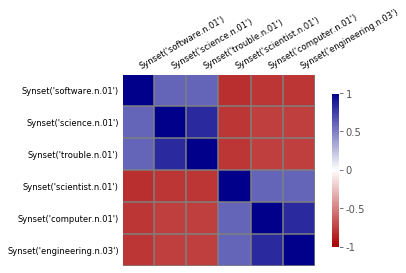

In [96]:
#http://nbviewer.jupyter.org/github/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb
from biokit.viz import corrplot
#c = corrplot.Corrplot(correlation_matrix)
c.plot(method='color')

/usr/local/lib/python3.5/site-packages/biokit/viz/linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)
/usr/local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


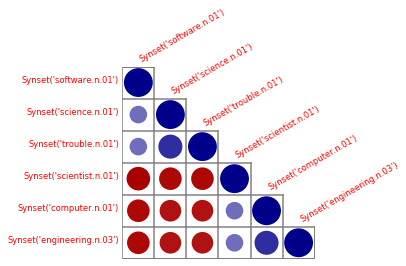

In [93]:
c.plot(colorbar=False, method='circle', shrink=.9, lower='circle',
       label_color='red'  )

/usr/local/lib/python3.5/site-packages/biokit/viz/linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)
/usr/local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


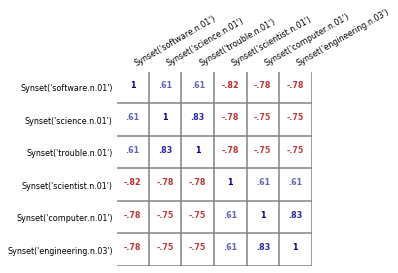

In [94]:
c.plot(method='text', fontsize=8, colorbar=False)

In [95]:
'''
calculate similartyin_pragraph

'''

def similarty_pragraph(pragraph,option):
    lesk_vec=pragraph_lesks(pragraph,option)
    lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
    sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_Dimensionality_reduction,option)
    return sim_lesk_vec_after_Dimensionality_reduction
    

In [66]:
res_df=similarty_pragraph(pragraphs[n_pragraph],'res')
res_df
#res_df.to_csv('res_df.csv')



/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0                     -0   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                     1.55201                     -0   
Synset('science.n.01')                           -0                3.08626   
Synset('scientist.n.01')                          0                     -0   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                       2.56104                      -0  
Synset('science.n.01')                             -0                0.622355  
Synset('scientist.n.01')                      1.55201                      -0  
Synset('trouble.n.01')                             -0                0.622355  
Synset('engineering.n.03')                          0                      -0  
Synset('software.n.01')                             0                       0

In [67]:
jcn_df=similarty_pragraph(pragraphs[n_pragraph],'jcn')
jcn_df

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0               0.069489   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                   0.0990353               0.066154   
Synset('science.n.01')                    0.0765573               0.111446   
Synset('scientist.n.01')                          0               0.072529   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                     0.0772455               0.0691328  
Synset('science.n.01')                        0.05762               0.0761502  
Synset('scientist.n.01')                    0.0765595               0.0761252  
Synset('trouble.n.01')                       0.055308               0.0721635  
Synset('engineering.n.03')                          0               0.0573749  
Synset('software.n.01')                             0                       0

In [77]:
lin_df=similarty_pragraph(pragraphs[n_pragraph],'lin')
lin_df

Computer 
 Synset('computer.n.01') 
 Computer science is a discipline that spans theory and practice.
science 
 Synset('science.n.01') 
 Computer science is a discipline that spans theory and practice.
discipline 
 Synset('discipline.n.02') 
 Computer science is a discipline that spans theory and practice.
spans 
 Synset('span.n.04') 
 Computer science is a discipline that spans theory and practice.
theory 
 Synset('theory.n.03') 
 Computer science is a discipline that spans theory and practice.
practice 
 Synset('practice.n.04') 
 Computer science is a discipline that spans theory and practice.
thinking 
 Synset('thinking.n.01') 
 It requires thinking both in abstract terms and in concrete terms.
abstract 
 Synset('outline.n.02') 
 It requires thinking both in abstract terms and in concrete terms.
terms 
 Synset('terminus.n.03') 
 It requires thinking both in abstract terms and in concrete terms.
concrete 
 Synset('concrete.n.01') 
 It requires thinking both in abstract terms and in c

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


 Synset('mathematician.n.01') 
 Drawing from a common core of computer science knowledge, each specialty area focuses on particular challenges.Computer Science is practiced by mathematicians, scientists and engineers.
scientists 
 Synset('scientist.n.01') 
 Drawing from a common core of computer science knowledge, each specialty area focuses on particular challenges.Computer Science is practiced by mathematicians, scientists and engineers.
engineers 
 Synset('engineer.n.02') 
 Drawing from a common core of computer science knowledge, each specialty area focuses on particular challenges.Computer Science is practiced by mathematicians, scientists and engineers.
Mathematics 
 Synset('mathematics.n.01') 
 Mathematics, the origins of Computer Science, provides reason and logic.
origins 
 Synset('origin.n.03') 
 Mathematics, the origins of Computer Science, provides reason and logic.
Computer 
 Synset('computer.n.01') 
 Mathematics, the origins of Computer Science, provides reason and logic.

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0                     -0   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                    0.245856                     -0   
Synset('science.n.01')                           -0               0.393272   
Synset('scientist.n.01')                          0                     -0   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                      0.267866                      -0  
Synset('science.n.01')                             -0               0.0711466  
Synset('scientist.n.01')                     0.201291                      -0  
Synset('trouble.n.01')                             -0               0.0676739  
Synset('engineering.n.03')                          0                      -0  
Synset('software.n.01')                             0                       0

# For All Document

In [78]:
pragraphs=txt_pragraphs(txt)
df = pd.DataFrame()
#listofDFPragraphs=[]
colB=[]
colAG1=[]
colAGF=[]
colAonFGF=[]
colAonFG=[]
skew=[]
kurtosis=[]
meanL=[]
meadianL=[]
FL=[]
for index in range(len(pragraphs)):
    print("Paragraph No.",index)
    lesk_vec=pragraph_lesks(pragraphs[index],'res')
    #print(type(lesk_vec))
    lesk_vec_before_reduction=count_freq(lesk_vec)
    lesk_vec_before_reduction.T.sort(['Freq'], ascending=[False]).T
    FSkew=st.skew(lesk_vec_before_reduction.T, bias=False)
    Fkurtosis=st.kurtosis(lesk_vec_before_reduction.T, bias=False)
    
    #print(FSkew)
    #print(st.kurtosis(lesk_vec_before_reduction.T, bias=False))
    sumd= lesk_vec_before_reduction.T.apply(np.sum)#np.sum(lesk_vec_before_reduction.ix['Freq':])
    lent=len(lesk_vec_before_reduction.T.index)
    median=np.median(lesk_vec_before_reduction.T)
    avg=int (round(sumd/lent))
    F=1
    if(FSkew>0):
        F=avg
    else:
        F=median
        
    
    meanL.append(avg)
    meadianL.append(median)
    FL.append(F)
    
    lenB=len(lesk_vec_before_reduction.T.index)
    print("Before  Reduction:",lenB,"\n",lesk_vec_before_reduction.T,"\n")
    
    #print(lenB)
    #listofDFPragraphs.append(lesk_vec_before_reduction)
    
    lesk_vec_after_Dimensionality_reduction_Greterthan_One=Dimensionality_reduction_Greterthan_One(lesk_vec)
    lesk_vec_after_Dimensionality_reduction_Greater_F=Dimensionality_reduction_Greater_F(lesk_vec,F)
    lesk_vec_after_Dimensionality_reduction_on_F_Greater_1=Dimensionality_reduction_on_F_Greater_1(lesk_vec,F)
    lesk_vec_after_Dimensionality_reduction_on_F_Greater_F=Dimensionality_reduction_on_F_Greater_F(lesk_vec,F)
    
    #lesk_vec_after_Dimensionality_reduction=Dimensionality_reduction(lesk_vec)
    
    #lenlesk_vec_after_Dimensionality_reduction_Greterthan_One=len(lesk_vec_after_Dimensionality_reduction_Greterthan_One.T.index)
    #print(lenA)
    #lesk_vec_after_Dimensionality_reductionG1=Dimensionality_reduction_Greterthan_One(lesk_vec)
    #print(lesk_vec_after_Dimensionality_reduction_Greterthan_One.head())
    lenAG1=len(lesk_vec_after_Dimensionality_reduction_Greterthan_One.T.index)
    print("After Reduction>1:",lenAG1,"\n",lesk_vec_after_Dimensionality_reduction_Greterthan_One.T,"\n")
    lenAGF=len(lesk_vec_after_Dimensionality_reduction_Greater_F.T.index)
    print("After Reduction> F:",lenAGF,"\n",lesk_vec_after_Dimensionality_reduction_Greater_F.T,"\n")
    lenAonFG1=len(lesk_vec_after_Dimensionality_reduction_on_F_Greater_1.T.index)
    print("After Reduction/F> 1:",lenAonFG1,"\n",lesk_vec_after_Dimensionality_reduction_on_F_Greater_1.T,"\n")
    lenAonFGF=len(lesk_vec_after_Dimensionality_reduction_on_F_Greater_F.T.index)
    print("After Reduction/F> F:",lenAonFGF,"\n",lesk_vec_after_Dimensionality_reduction_on_F_Greater_F.T,"\n")
    #colB.append(index)
    
    colB.append(lenB)
    skew.append(FSkew)
    kurtosis.append(Fkurtosis)
    colAG1.append(lenAG1)
    colAGF.append(lenAGF)
    colAonFG.append(lenAonFG1)
    colAonFGF.append(lenAonFGF)
    print("------------------End of Pragraph----------------------------\n")
    


    
    
    #listofDFPragraphs.append(rows)
    #print(type(lesk_vec_after_Dimensionality_reduction))
    #sim_lesk_vec_after_Dimensionality_reduction=sim_pragraph_lesk(lesk_vec_after_Dimensionality_reduction,'res')
    #print(type(sim_lesk_vec_after_Dimensionality_reduction))

df['Befor Reduction'] = colB
df['Skew'] = skew
df['kurtosis'] = kurtosis
df['Mean'] = meanL
df['Median'] = meadianL
df['F'] = FL
df['After Reduction>1'] = colAG1
df['After Reduction> F'] = colAGF
df['After Reduction/F> 1'] = colAonFG
df['After Reduction/F> F'] = colAonFGF
df
    #print("---------------------------End Pragraph----------------------------------\n")

Paragraph No. 0
Computer 
 Synset('computer.n.01') 
 Computer science is a discipline that spans theory and practice.
science 
 Synset('science.n.01') 
 Computer science is a discipline that spans theory and practice.
discipline 
 Synset('discipline.n.02') 
 Computer science is a discipline that spans theory and practice.
spans 
 Synset('span.n.04') 
 Computer science is a discipline that spans theory and practice.
theory 
 Synset('theory.n.03') 
 Computer science is a discipline that spans theory and practice.
practice 
 Synset('practice.n.04') 
 Computer science is a discipline that spans theory and practice.
thinking 
 Synset('thinking.n.01') 
 It requires thinking both in abstract terms and in concrete terms.
abstract 
 Synset('outline.n.02') 
 It requires thinking both in abstract terms and in concrete terms.
terms 
 Synset('terminus.n.03') 
 It requires thinking both in abstract terms and in concrete terms.
concrete 
 Synset('concrete.n.01') 
 It requires thinking both in abstrac

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


                                      Freq
Synset('wish.n.01')                      1
Synset('present.n.01')                   1
Synset('computer_science.n.01')          1
Synset('preciseness.n.02')               1
Synset('reasoning.n.01')                 1
Synset('cognition.n.01')                 2
Synset('computer_architecture.n.02')     1
Synset('finding.n.02')                   1
Synset('challenge.n.05')                 1
Synset('programmer.n.01')                1
Synset('side.n.09')                      1
Synset('thinking.n.01')                  1
Synset('origin.n.03')                    1
Synset('modeling.n.02')                  1
Synset('user.n.01')                      1
Synset('polish.n.02')                    1
Synset('intensifier.n.01')               1
Synset('stove.n.01')                     1
Synset('engineer.n.02')                  1
Synset('care.n.04')                      1
Synset('effect.n.04')                    1
Synset('resolution.n.04')                2
Synset('eng

Befor Reduction             Skew         kurtosis  Mean  Median  F  \
0               71  [5.36699473148]  [30.8795979486]     2     1.0  2   
1               53  [2.50119444179]  [5.98170092915]     2     1.0  2   
2               64  [4.41150451047]  [20.7076790505]     2     1.0  2   
3               36  [3.92266733461]  [18.0680788957]     1     1.0  1   
4               17  [1.98336765198]  [3.44243678458]     1     1.0  1   
5               39   [3.3255906777]  [12.5213076841]     1     1.0  1   
6               39  [2.61191721637]  [7.25485890282]     2     1.0  2   

   After Reduction>1  After Reduction> F  After Reduction/F> 1  \
0                 14                   6                     6   
1                 17                   7                     7   
2                 13                   6                     6   
3                  8                   8                     8   
4                  4                   4                     4   
5                  9                   9                     9   
6                 10                   5                     5   

   After Reduction/F> F  
0                     3  
1                     4  
2                     2  
3                     8  
4                     4  
5                     9  
6                     1

# Classfication per pragraph

In [79]:
'''
to calculate mean per colum and ratio of this mean for any matrix 
'''

def add_mean_ratio(df):
    inverse_df=df.T

    #inverse_df['Mean']=inverse_df.apply(np.mean)
    inverse_df['Mean']=inverse_df.mean(axis=1)
    total=inverse_df.values.sum()

    #ss['Max']=ss.apply(np.max)
    #ss['MIN']=ss.apply(np.min)
    #ss['Total']=ss.apply(np.sum) #[col,row] #.apply(np.mean)
    #ss.groupby("Mean").sum()
    total_mean=inverse_df['Mean'].sum()

    inverse_df['Ratio_mean']=inverse_df['Mean']/total_mean#ss.apply(np.mean)
    #ss['RATIO']=ss.apply(ss['Mean']/ss['Total'])
    return inverse_df.T
    

In [80]:

#inverse_df=res_df.T
#inverse_df['Mean']=inverse_df.mean(axis=1)
#inverse_df.T

mres_df=add_mean_ratio(res_df)
mres_df

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0                     -0   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0                      0   
Ratio_mean                                       0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                     1.55201                     -0   
Synset('science.n.01')                           -0                3.08626   
Synset('scientist.n.01')                          0                     -0   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                       0.258669               0.514377   
Ratio_mean                                 0.155263               0.308748   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                       2.56104                      -0  
Synset('science.n.01')                             -0                0.622355  
Synset('scientist.n.01')                      1.55201                      -0  
Synset('trouble.n.01')                             -0                0.622355  
Synset('engineering.n.03')                          0                      -0  
Synset('software.n.01')                             0                       0  
Mean                                         0.685509                0.207452  
Ratio_mean                                   0.411469                 0.12452

In [81]:
'''
multible each pragraph element in ratio of frequancy
'''
def pragraph_ratio_mean(res_df,rmv_red_ratio):
    pragraph_ratio_values=res_df.values*rmv_red_ratio.T['Ratio'].T.values
    pragraph_ratio_df= pd.DataFrame(pragraph_ratio_values,index=res_df.index, columns=res_df.columns)
    pragraph_ratio_df_mean=add_mean_ratio(pragraph_ratio_df)
    return pragraph_ratio_df_mean



In [82]:
'''
multible each pragraph element in freq of frequancy
'''
def pragraph_freq_mean(res_df,rmv_red_ratio):
    pragraph_freq_values=res_df.values*rmv_red_ratio.T['Freq'].T.values
    pragraph_freq_df= pd.DataFrame(pragraph_freq_values,index=res_df.index, columns=res_df.columns)
    pragraph_freq_df_mean=add_mean_ratio(pragraph_freq_df)
    return pragraph_freq_df_mean

In [83]:
pragraph_ratio_mean_res=pragraph_ratio_mean(res_df,rmv_red_ratio)
pragraph_ratio_mean_res


Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0                     -0   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0                      0   
Ratio_mean                                       0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                    0.176365                     -0   
Synset('science.n.01')                           -0               0.280569   
Synset('scientist.n.01')                          0                     -0   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                      0.0293942              0.0467615   
Ratio_mean                                 0.214494               0.341227   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                      0.174617                      -0  
Synset('science.n.01')                             -0               0.0424333  
Synset('scientist.n.01')                     0.105819                      -0  
Synset('trouble.n.01')                             -0               0.0424333  
Synset('engineering.n.03')                          0                      -0  
Synset('software.n.01')                             0                       0  
Mean                                        0.0467393               0.0141444  
Ratio_mean                                   0.341065                0.103214

In [84]:
pragraph_freq_mean_res=pragraph_freq_mean(res_df,rmv_red_ratio)
pragraph_freq_mean_res

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0                     -0   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0                      0   
Ratio_mean                                       0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                     7.76006                     -0   
Synset('science.n.01')                           -0                 12.345   
Synset('scientist.n.01')                          0                     -0   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                        1.29334                2.05751   
Ratio_mean                                 0.214494               0.341227   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                       7.68313                      -0  
Synset('science.n.01')                             -0                 1.86706  
Synset('scientist.n.01')                      4.65604                      -0  
Synset('trouble.n.01')                             -0                 1.86706  
Synset('engineering.n.03')                          0                      -0  
Synset('software.n.01')                             0                       0  
Mean                                          2.05653                0.622355  
Ratio_mean                                   0.341065                0.103214

In [85]:
pragraph_ratio_mean_jcn=pragraph_ratio_mean(jcn_df,rmv_red_ratio)
pragraph_ratio_mean_jcn

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0              0.0189515   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0             0.00315859   
Ratio_mean                                       0                0.18265   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                    0.011254               0.006014   
Synset('science.n.01')                    0.0086997              0.0101314   
Synset('scientist.n.01')                          0             0.00659355   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                     0.00332562             0.00378983   
Ratio_mean                                 0.192309               0.219152   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                    0.00526674               0.0047136  
Synset('science.n.01')                     0.00392864              0.00519206  
Synset('scientist.n.01')                   0.00521997              0.00519036  
Synset('trouble.n.01')                       0.003771              0.00492024  
Synset('engineering.n.03')                          0              0.00391192  
Synset('software.n.01')                             0                       0  
Mean                                       0.00303106              0.00398803  
Ratio_mean                                   0.175275                0.230614

In [86]:
pragraph_freq_mean_jcn=pragraph_freq_mean(jcn_df,rmv_red_ratio)
pragraph_freq_mean_jcn

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0               0.833868   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0               0.138978   
Ratio_mean                                       0                0.18265   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                    0.495177               0.264616   
Synset('science.n.01')                     0.382787               0.445783   
Synset('scientist.n.01')                          0               0.290116   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                       0.146327               0.166752   
Ratio_mean                                 0.192309               0.219152   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                      0.231736                0.207398  
Synset('science.n.01')                        0.17286                0.228451  
Synset('scientist.n.01')                     0.229679                0.228376  
Synset('trouble.n.01')                       0.165924                0.216491  
Synset('engineering.n.03')                          0                0.172125  
Synset('software.n.01')                             0                       0  
Mean                                         0.133367                0.175473  
Ratio_mean                                   0.175275                0.230614

In [87]:
'''
to calculate (IC(c1) + IC(c2 )) by res and jcn
'''

def p_IC_C(res_df,jcn_df):
    ic=2*(res_df.values)
    pic= pd.DataFrame(jcn_df.values+ic,index=res_df.index, columns=res_df.columns)
    
    return pic

In [88]:
p_IC_C_df=p_IC_C(res_df,jcn_df)
p_IC_C_df

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0               0.069489   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                     3.20306               0.066154   
Synset('science.n.01')                    0.0765573                6.28397   
Synset('scientist.n.01')                          0               0.072529   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                       5.19934               0.0691328  
Synset('science.n.01')                        0.05762                 1.32086  
Synset('scientist.n.01')                      3.18058               0.0761252  
Synset('trouble.n.01')                       0.055308                 1.31687  
Synset('engineering.n.03')                          0               0.0573749  
Synset('software.n.01')                             0                       0

In [89]:
pragraph_ratio_mean_pic=pragraph_ratio_mean(p_IC_C_df,rmv_red_ratio)
pragraph_ratio_mean_pic

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0              0.0189515   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0             0.00315859   
Ratio_mean                                       0              0.0108404   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                    0.363984               0.006014   
Synset('science.n.01')                    0.0086997                0.57127   
Synset('scientist.n.01')                          0             0.00659355   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                      0.0621139              0.0973129   
Ratio_mean                                 0.213178               0.333982   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                        0.3545               0.0047136  
Synset('science.n.01')                     0.00392864               0.0900586  
Synset('scientist.n.01')                     0.216858              0.00519036  
Synset('trouble.n.01')                       0.003771               0.0897868  
Synset('engineering.n.03')                          0              0.00391192  
Synset('software.n.01')                             0                       0  
Mean                                        0.0965096               0.0322769  
Ratio_mean                                   0.331225                0.110776

In [90]:
pragraph_freq_mean_pic=pragraph_freq_mean(p_IC_C_df,rmv_red_ratio)
pragraph_freq_mean_pic

Synset('computer.n.01') Synset('science.n.01')  \
Synset('computer.n.01')                          0               0.833868   
Synset('science.n.01')                           0                      0   
Synset('scientist.n.01')                         0                      0   
Synset('trouble.n.01')                           0                      0   
Synset('engineering.n.03')                       0                      0   
Synset('software.n.01')                          0                      0   
Mean                                             0               0.138978   
Ratio_mean                                       0              0.0108404   

                           Synset('scientist.n.01') Synset('trouble.n.01')  \
Synset('computer.n.01')                     16.0153               0.264616   
Synset('science.n.01')                     0.382787                25.1359   
Synset('scientist.n.01')                          0               0.290116   
Synset('trouble.n.01')                            0                      0   
Synset('engineering.n.03')                        0                      0   
Synset('software.n.01')                           0                      0   
Mean                                        2.73301                4.28177   
Ratio_mean                                 0.213178               0.333982   

                           Synset('engineering.n.03') Synset('software.n.01')  
Synset('computer.n.01')                        15.598                0.207398  
Synset('science.n.01')                        0.17286                 3.96258  
Synset('scientist.n.01')                      9.54175                0.228376  
Synset('trouble.n.01')                       0.165924                 3.95062  
Synset('engineering.n.03')                          0                0.172125  
Synset('software.n.01')                             0                       0  
Mean                                          4.24642                 1.42018  
Ratio_mean                                   0.331225                0.110776

In [ ]:
mjcn_df=add_mean_ratio(jcn_df)
mjcn_df

In [ ]:
picc=add_mean_ratio(p_IC_C_df)
picc

## Multiple Sparse Matrix of Similarity by freq.

In [ ]:
sc=scipy.sparse.csr_matrix(picc.values)
print(type(sc))

In [328]:
import numpy as np
lesk_vec=[]# synset lesk of words per pragraph
synset_lesk_noDuplicates=[]
Sentences=pragraph_to_setnences(pragraphs[1])
for sentence in Sentences:
    Words=remove_stopword_sentences(sentence)
    for word in Words:
        lesk_synset=lesk_word_sentence(word,sentence)
        if lesk_synset is not None:
            lesk_vec.append(lesk_synset)

#Count Freq
df_freq=count_freq(lesk_vec)
df_freq
#print(df_freq.values.sum())
#print(df_freq.T)

ss=DataFrame.dropna(df_freq[df_freq.ix['Freq':] > 1].T)
#total=ss.values.sum().sum()
#ss['Ratio']=(ss['Freq']/total)
#ss.T
ss.apply(np.mean)
#ss.ix[0,1 ] #[col,row] #.apply(np.mean)

Freq    3.25
dtype: float64

# Data Visualization

## Pragraph Bar Chart

In [329]:
'''
return bar chart of pragraph 
'''

import seaborn as sns
def pragraph_bar_ratio_mean_sns(pragraph_df):
    df=pragraph_df.T[['Ratio_mean']].T
    return sns.factorplot(data=df, kind='bar')
   


In [330]:
#pragraph_bar_ratio_mean_sns(mjcn_df)

In [331]:
import matplotlib.pyplot as plt
'''
bar per column in dataframe
'''
def pragraph_bar_ratio_mean(pragraph_df):
    df=pragraph_df.T[['Ratio_mean']]
    ax = df.plot(kind='bar', title ="Key Word Ratio", figsize=(10, 10), legend=True, fontsize=12)
    ax.set_xlabel("Key Words", fontsize=12)
    ax.set_ylabel("Ratio_mean", fontsize=12)
    plt.show()
    fig = ax.get_figure()
    fig.savefig("total-sales.png")

In [332]:
#pragraph_bar_ratio_mean(mjcn_df)

## Pragraph Pie

In [333]:
'''
return pie of pragraph
'''

import matplotlib.pyplot as plt
def pragraph_pie_ratio_mean(pragraph_df):
    #plt.pie(mjcn_df.T[['Ratio_mean']])
    #mjcn_df.T[['Ratio_mean']].plot(kind='pie',subplots=True)
    fig = plt.figure(figsize=(6,6), dpi=200)
    ax = plt.subplot(111)
    fig2 = ax.get_figure()
    fig.savefig("pie.png")
    return pragraph_df.T[['Ratio_mean']].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, subplots=True)
    #mjcn_df.T[['Ratio_mean']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2dc091748>], dtype=object)

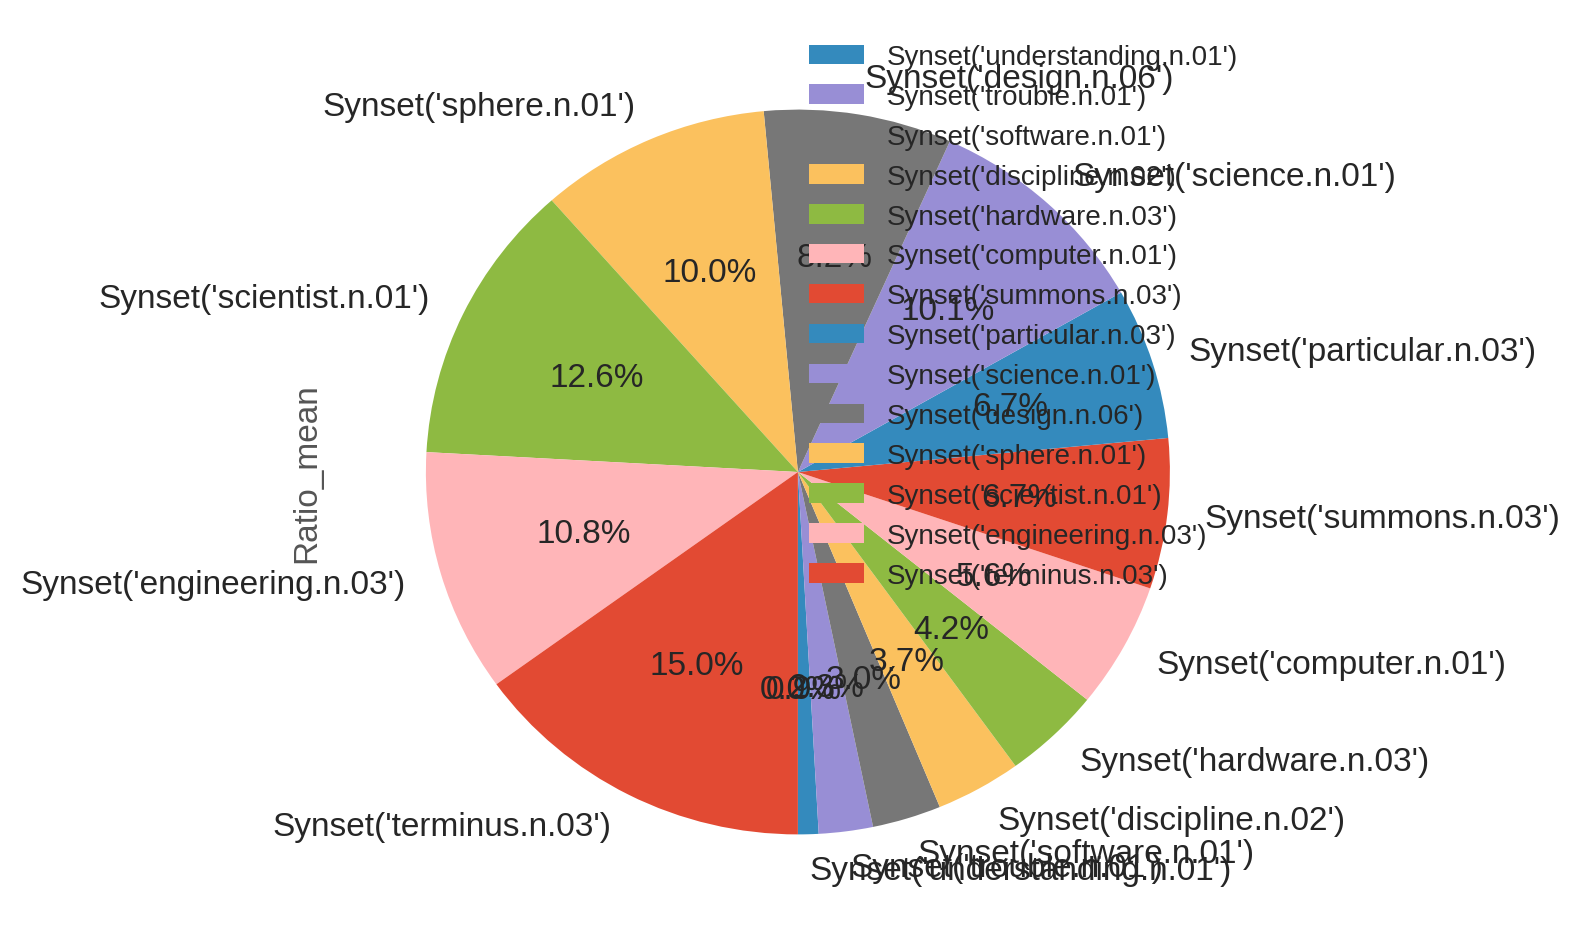

In [334]:
pragraph_pie_ratio_mean(mjcn_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2dc0a3470>], dtype=object)

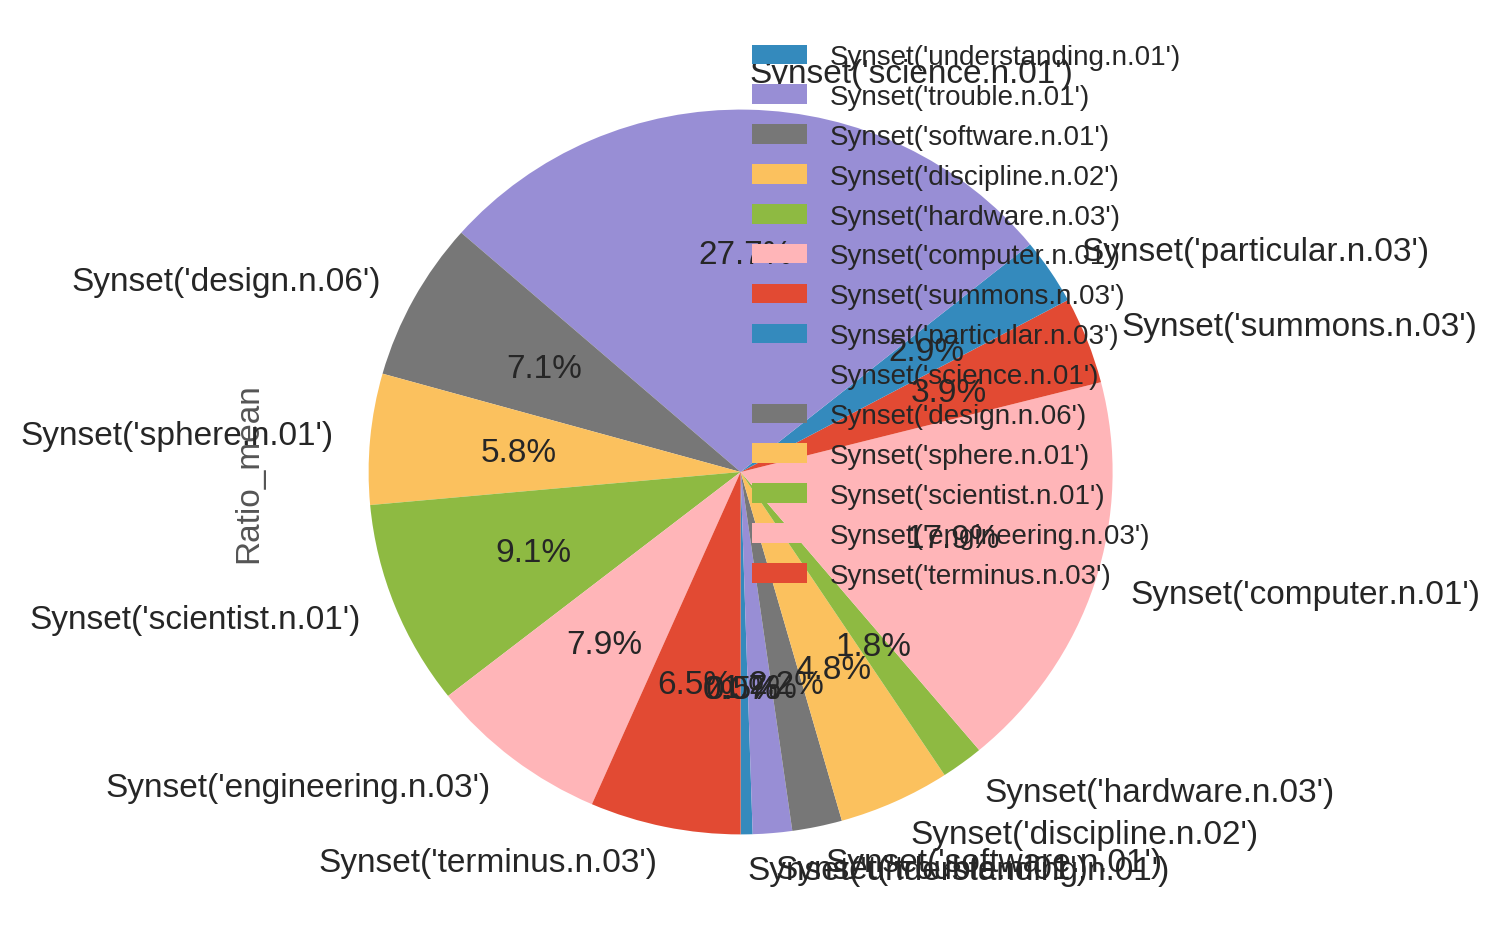

In [335]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_jcn)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c7246a90>], dtype=object)

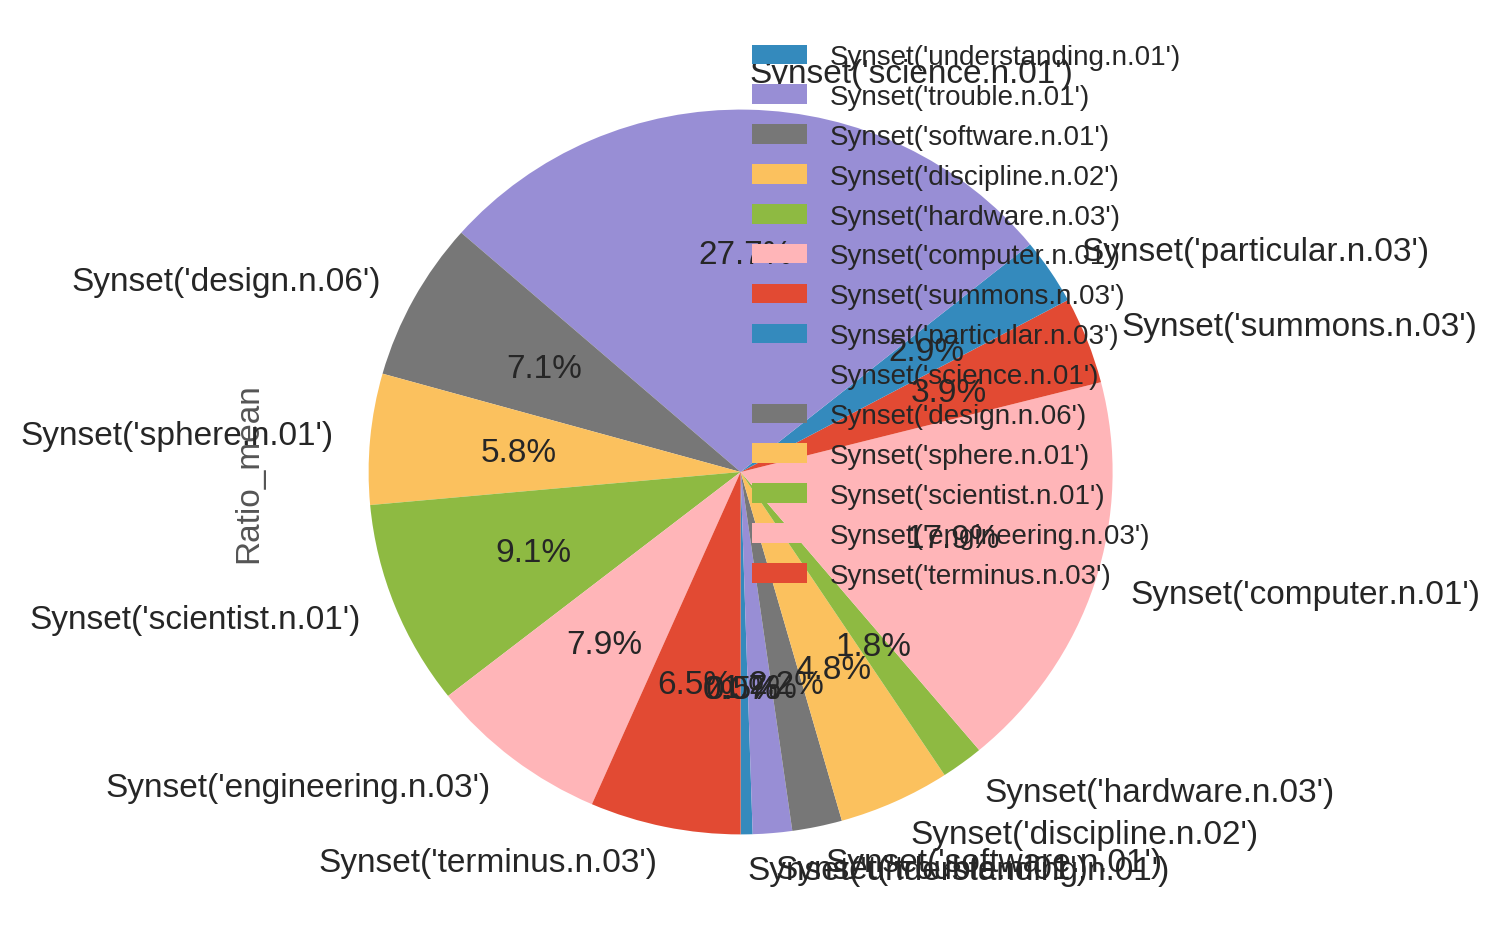

In [336]:
pragraph_pie_ratio_mean(pragraph_freq_mean_jcn)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c702ba90>], dtype=object)

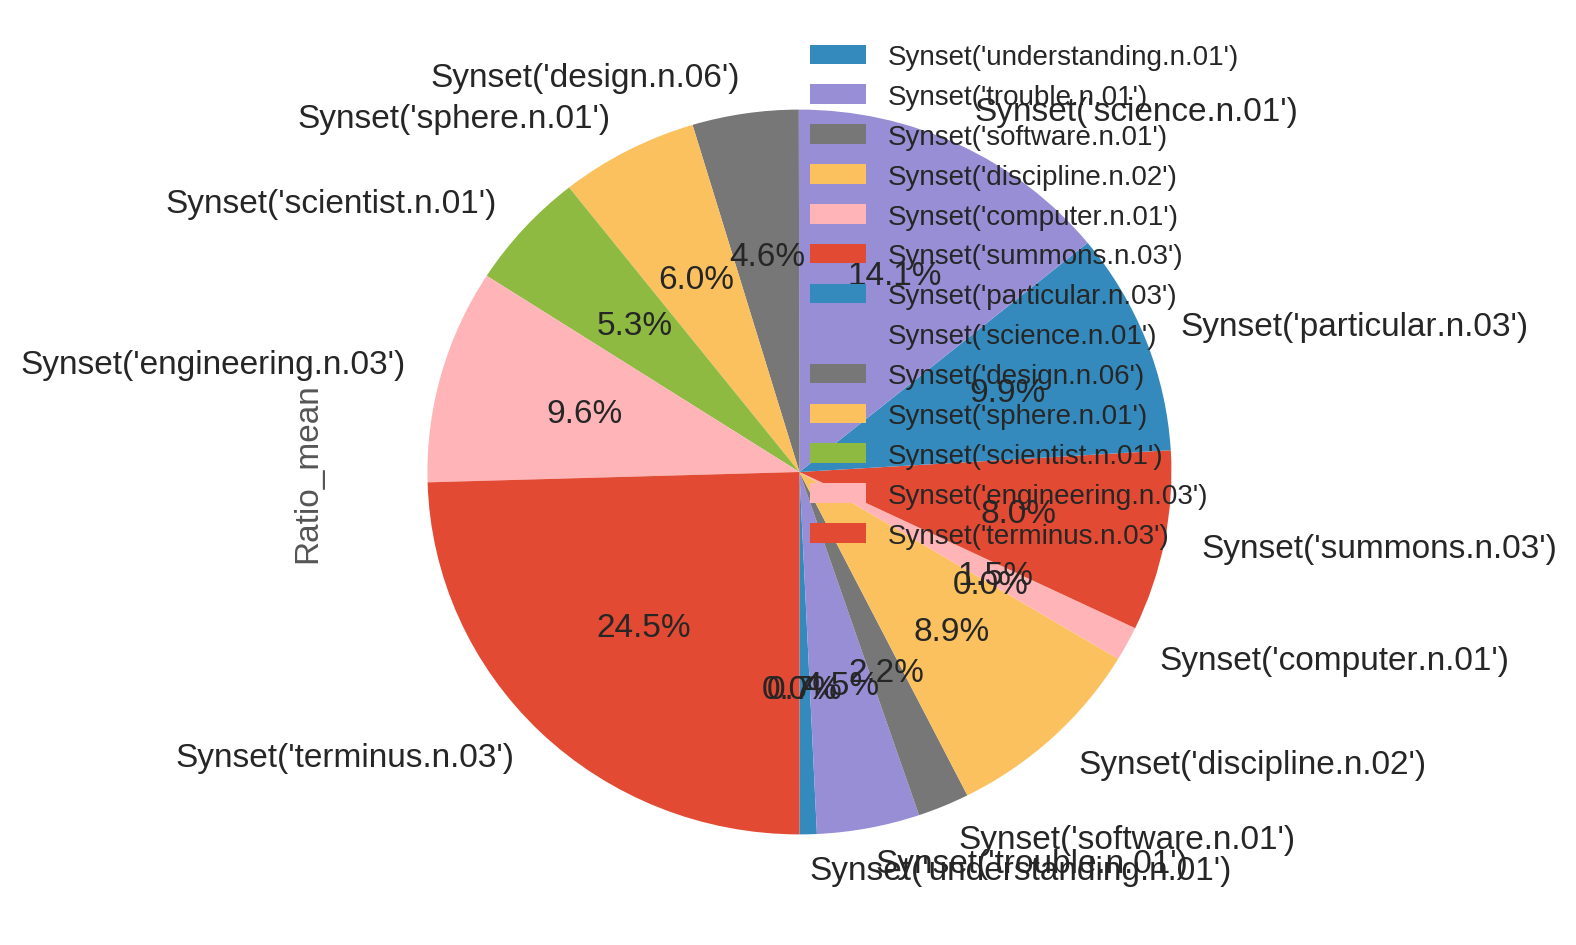

In [337]:
pragraph_pie_ratio_mean(mres_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c71a8b38>], dtype=object)

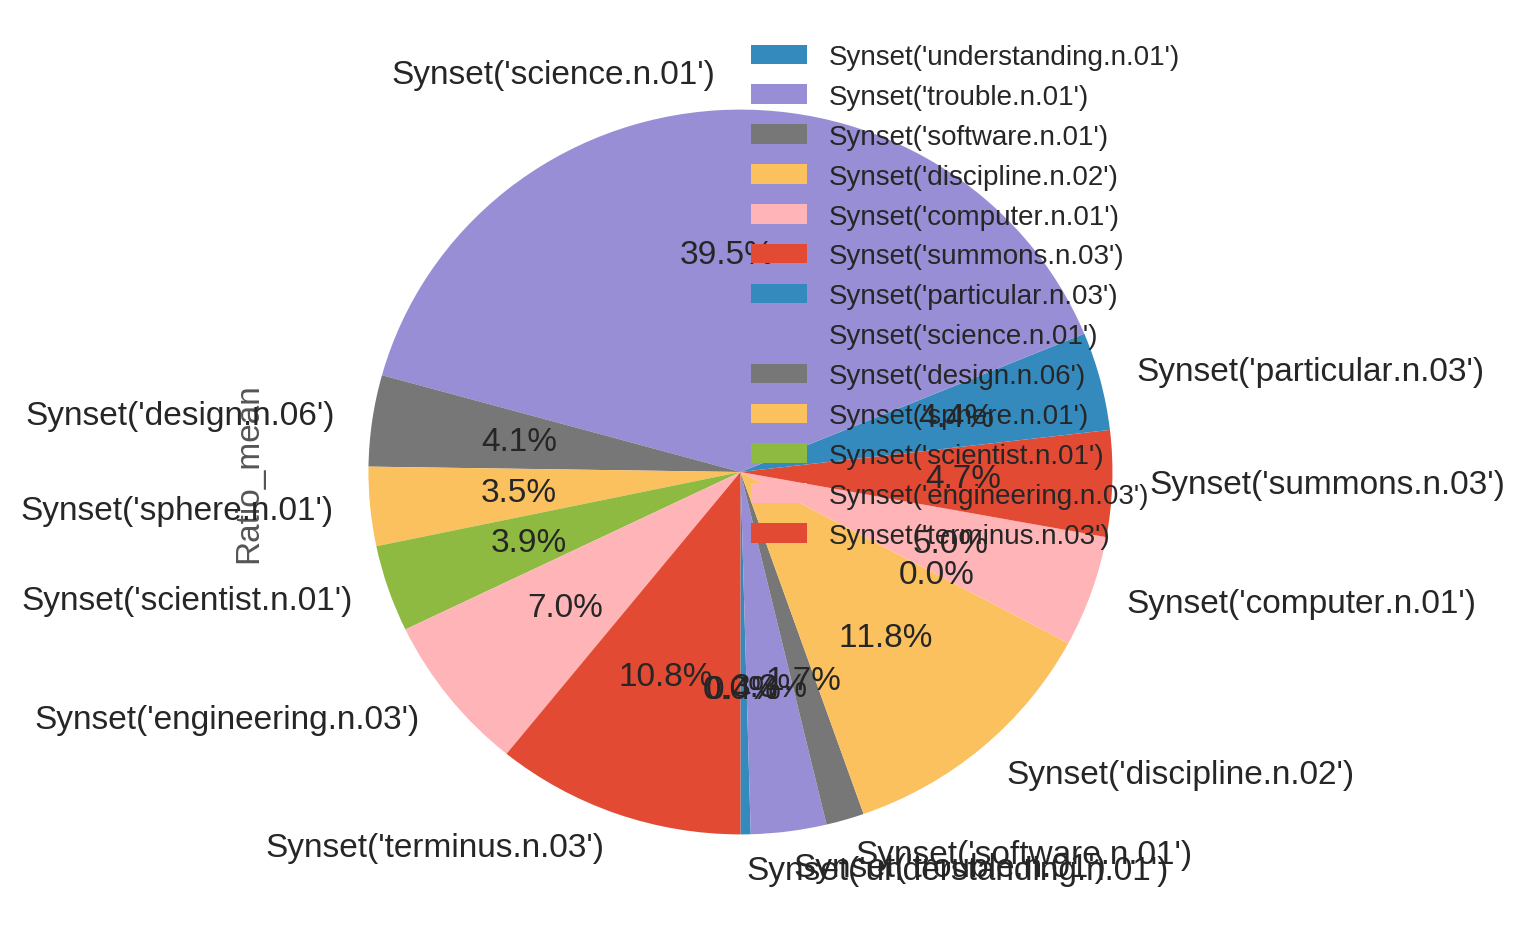

In [338]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_res)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd50ae10>], dtype=object)

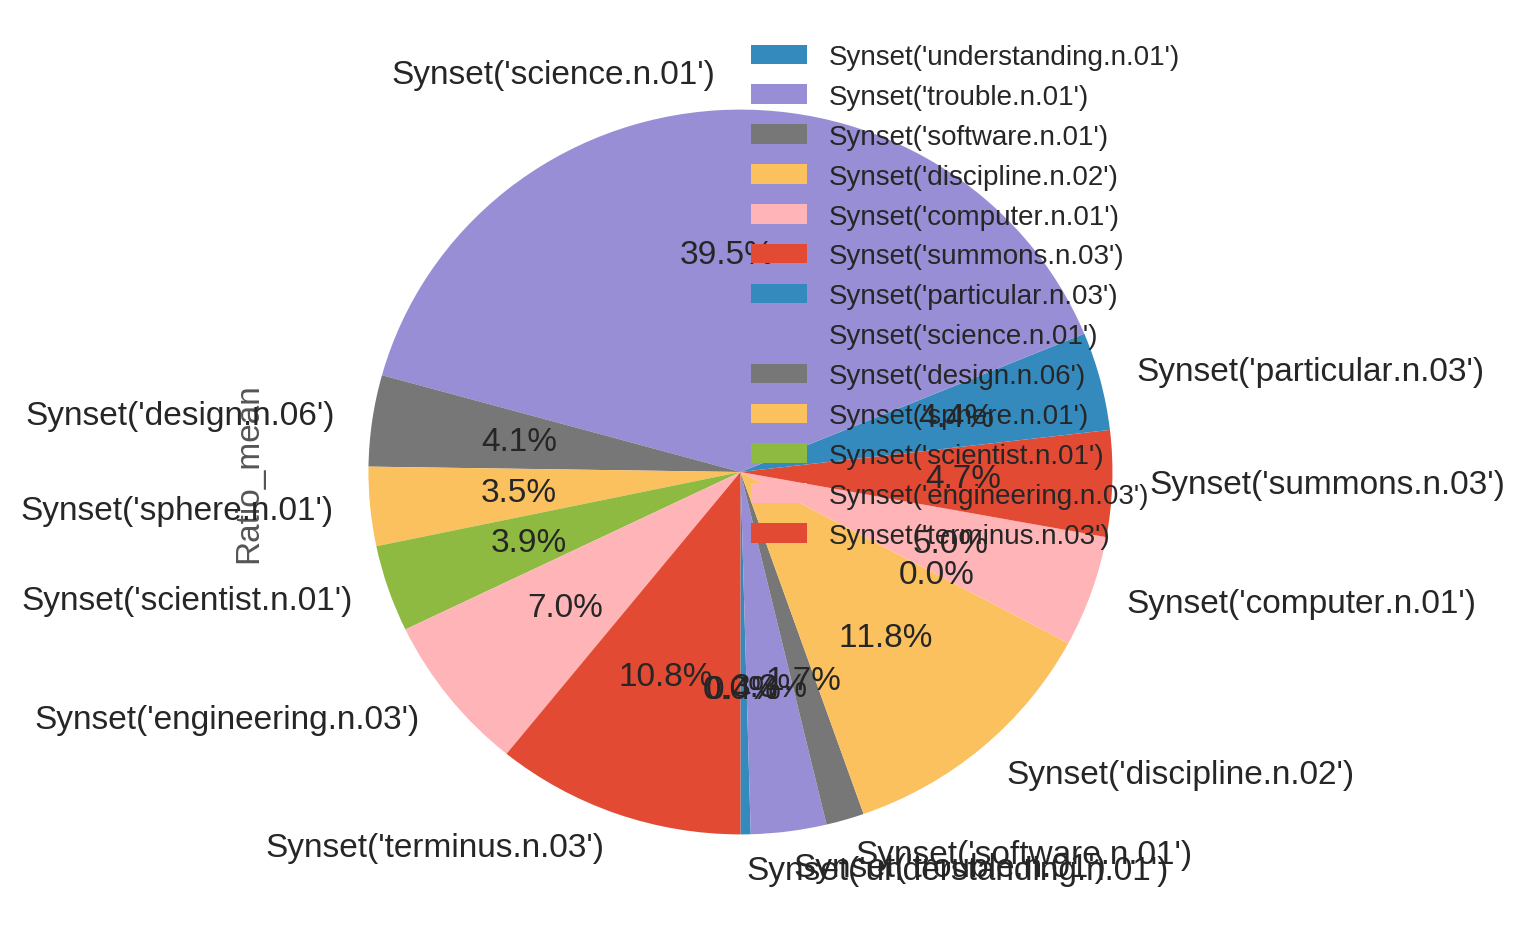

In [339]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_res)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c31e3cf8>], dtype=object)

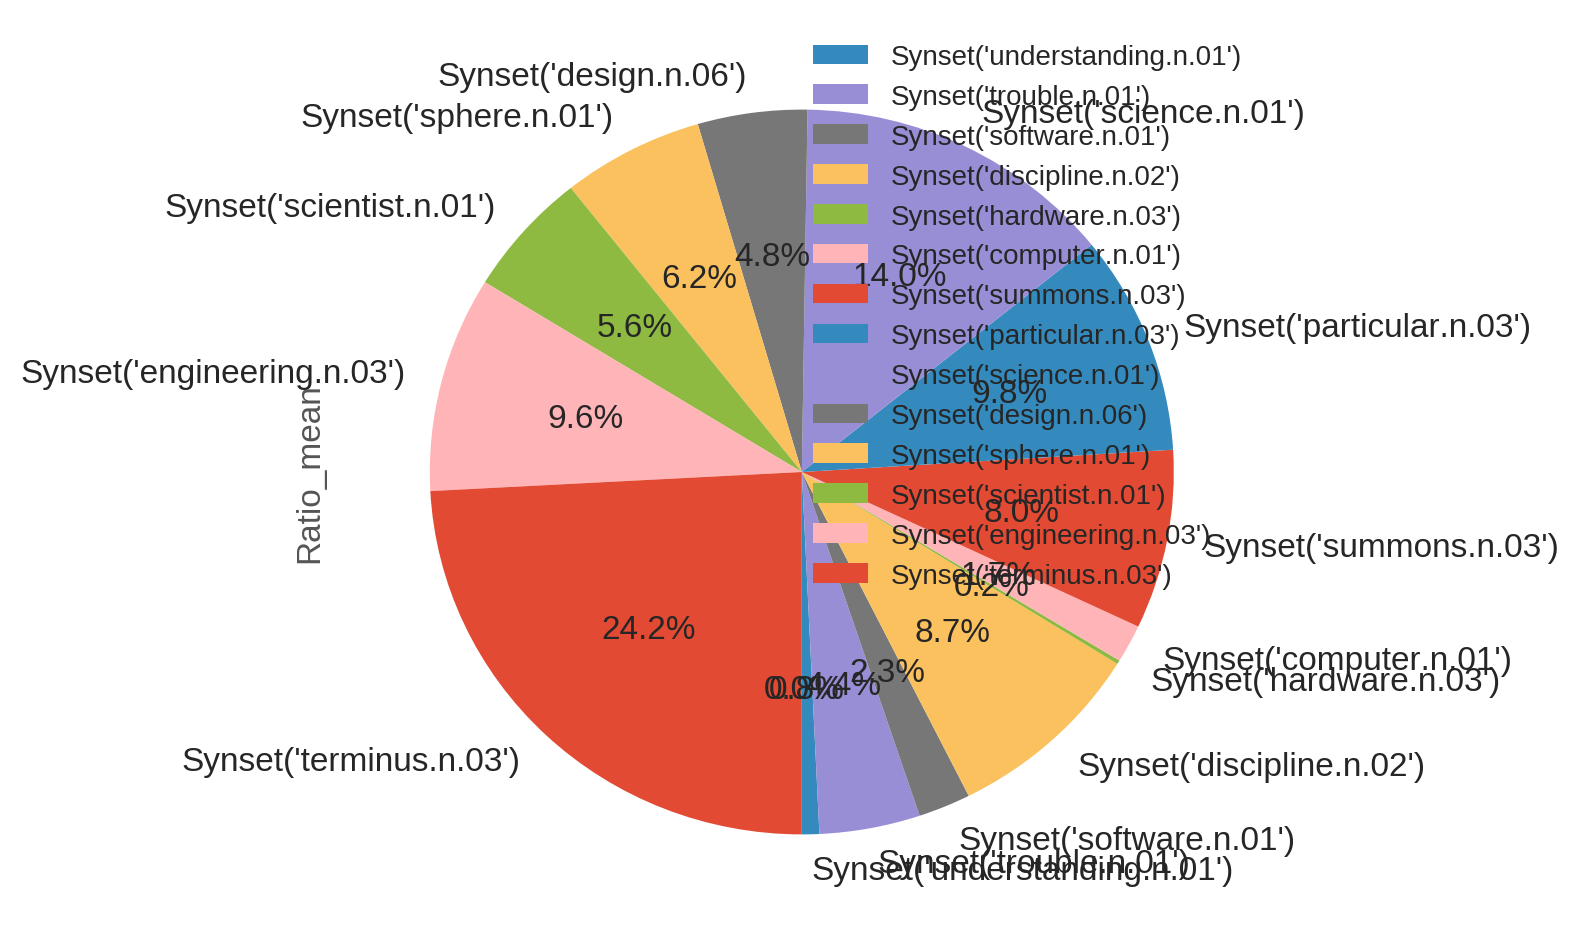

In [340]:
pragraph_pie_ratio_mean(picc)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c265aa20>], dtype=object)

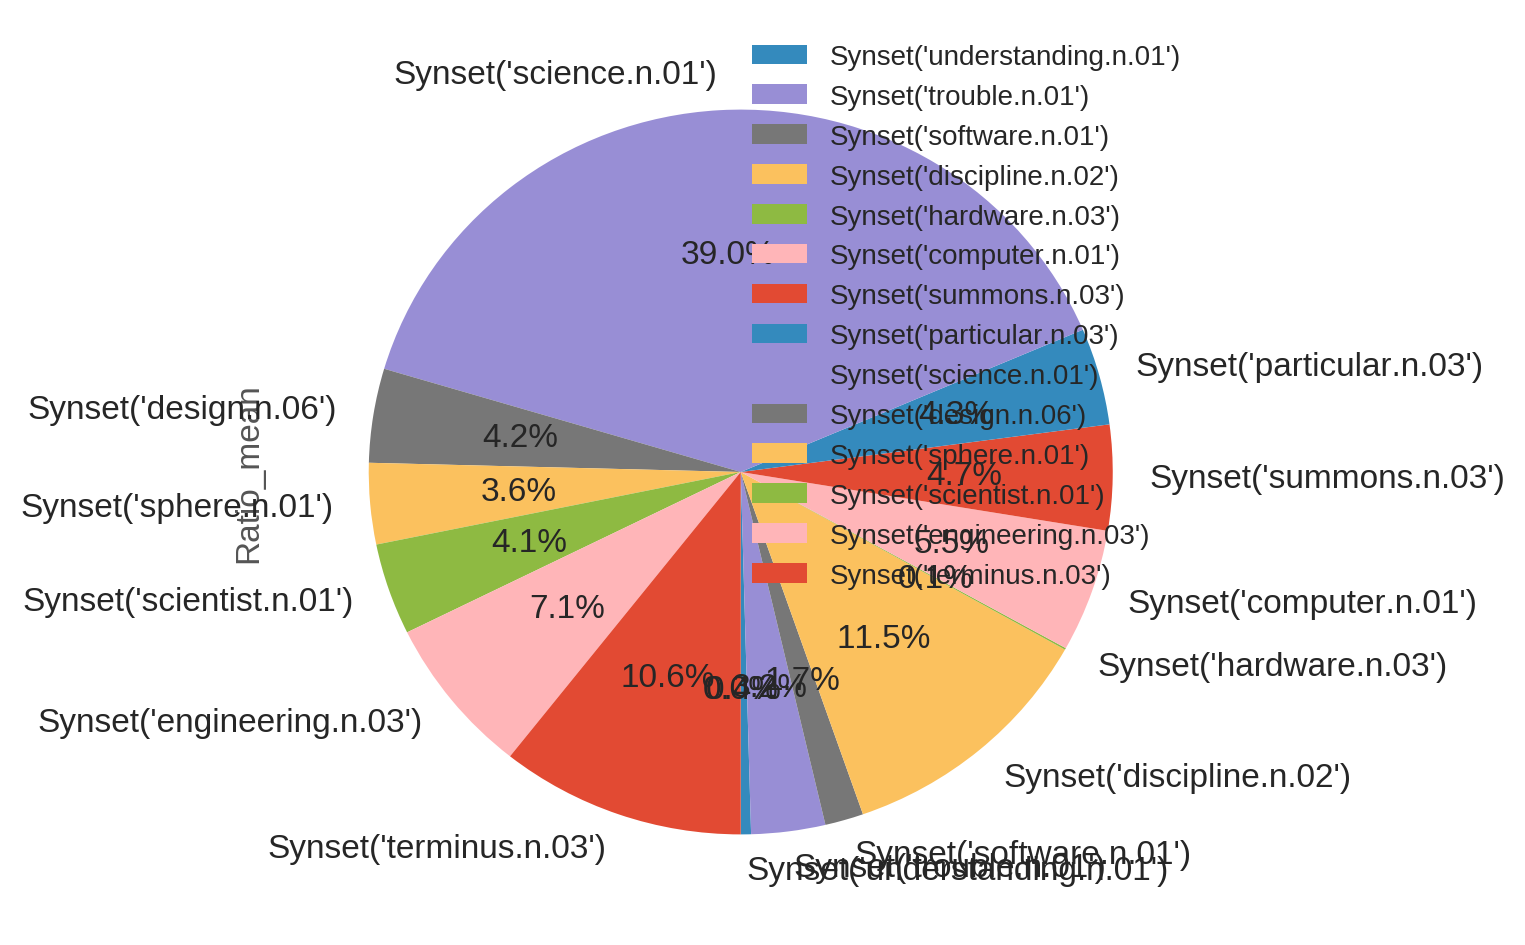

In [341]:
pragraph_pie_ratio_mean(pragraph_ratio_mean_pic)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c1a1f978>], dtype=object)

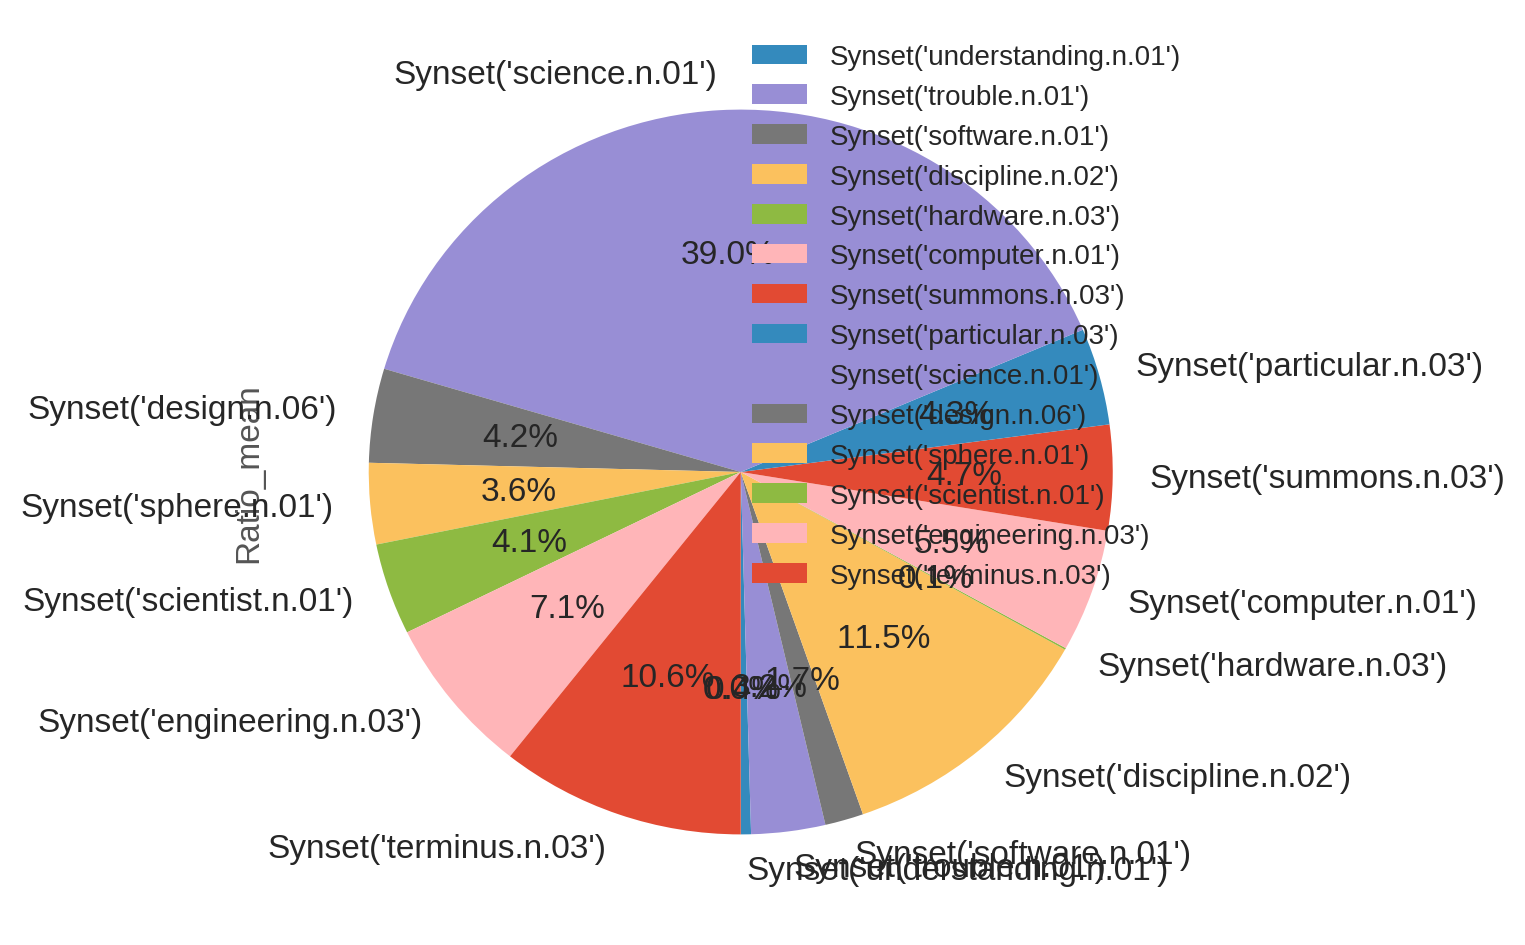

In [342]:
pragraph_pie_ratio_mean(pragraph_freq_mean_pic)

In [343]:
def pragraph_concat_bar_ratio_mean(mjcn_df,picc,mres_df):
    df=pd.concat([mjcn_df.T[['Ratio_mean']].T,picc.T[['Ratio_mean']].T, mres_df.T[['Ratio_mean']].T])
    df.index=['JCN','RES','PICC']
    #df
    #df=pragraph_df.T[['Ratio_mean']]
    ax = df.T.plot(kind='bar', title ="Key Word Ratio", figsize=(10, 10), legend=True, fontsize=12)
    ax.set_xlabel("Key Words", fontsize=12)
    #ax.set_ylabel("Ratio_mean", fontsize=12)
    plt.show()

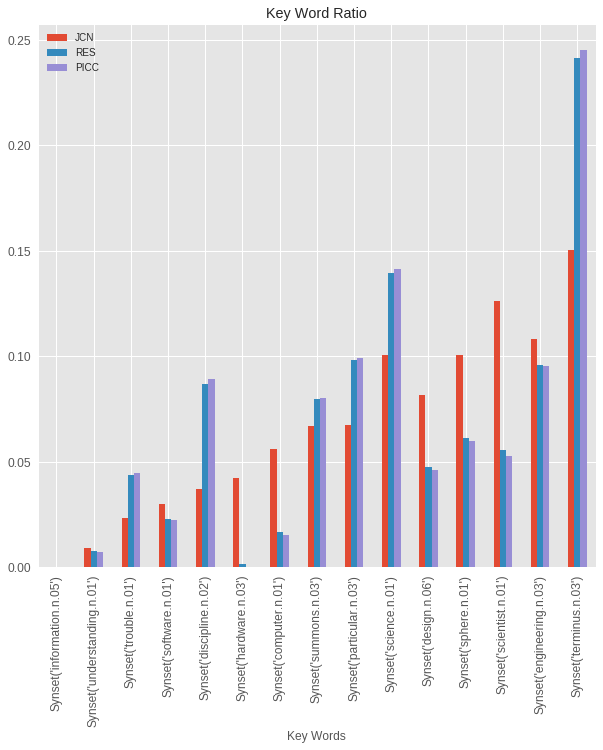

In [344]:
'''
After multible frequancy ratio in mean per column
'''
pragraph_concat_bar_ratio_mean(mjcn_df,picc,mres_df)

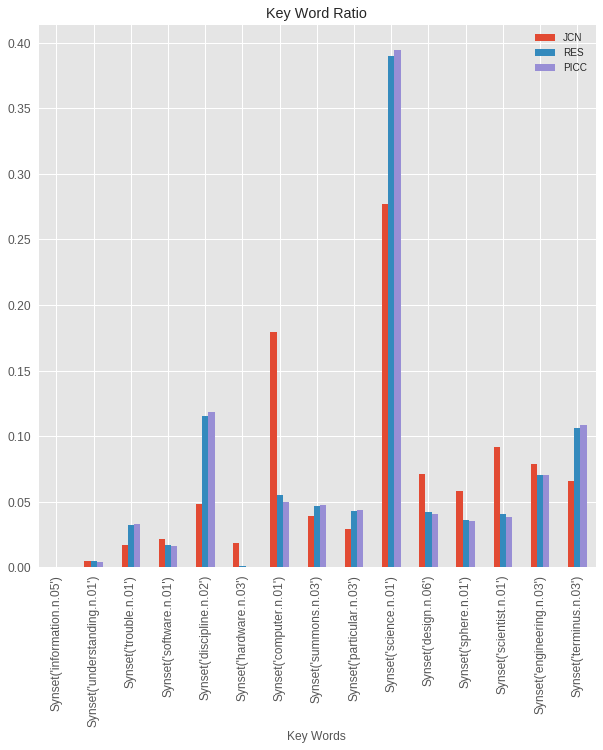

In [345]:
'''
After multible frequancy ratio in each element dataframe
'''
pragraph_concat_bar_ratio_mean(pragraph_ratio_mean_jcn,pragraph_ratio_mean_pic,pragraph_ratio_mean_res)

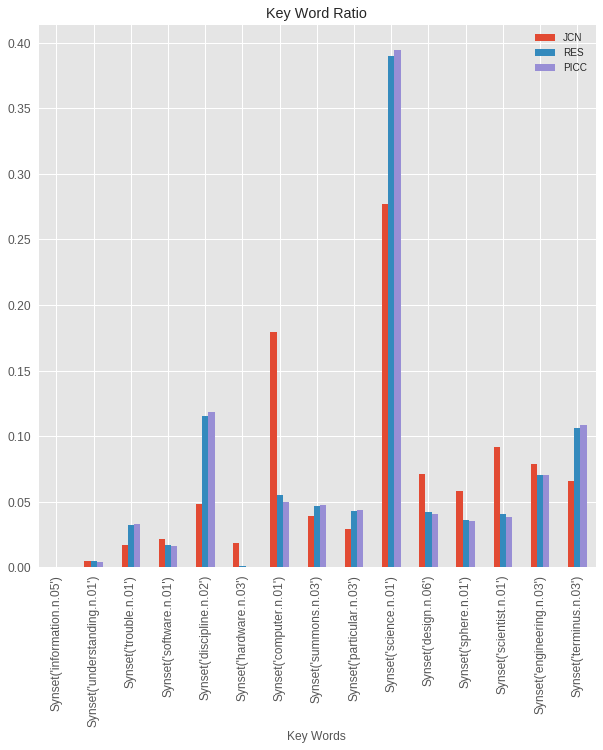

In [346]:
'''
After multible frequancy freq. in each element dataframe
'''
pragraph_concat_bar_ratio_mean(pragraph_freq_mean_jcn,pragraph_freq_mean_pic,pragraph_freq_mean_res)